In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
csv = pd.read_csv('updated2.csv', encoding='latin-1')
csv.head()

,date,AverageTemperatureF,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
0,1743-11-01,42.9224,6.068,1.737,ÃÃÃÃ¤rhus,Denmark,0.80N,124.55E,1869
1,1744-04-01,42.4184,5.788,3.624,ÃÃÃÃ¤rhus,Denmark,0.80N,124.55E,1878
2,1744-05-01,51.1592,10.644,1.283,ÃÃÃÃ¤rhus,Denmark,0.80N,124.55E,1878
3,1744-06-01,57.2918,14.051,1.347,ÃÃÃÃ¤rhus,Denmark,0.80N,124.55E,1878
4,1744-07-01,60.9476,16.082,1.396,ÃÃÃÃ¤rhus,Denmark,0.80N,124.55E,1878


In [3]:
csv.dtypes

date                              object
AverageTemperatureF              float64
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
year                               int64
dtype: object

In [4]:
csv = csv.dropna()

In [5]:
csv.shape

(1048575, 9)

In [6]:
df = pd.DataFrame(csv)
 
df['City'].nunique()

435

In [7]:
df['Country'].nunique()

88

In [8]:
df['date'].nunique()

3002

In [9]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

In [10]:
df['Longitude'] = df['Longitude'].str.replace('E', '')
df['Longitude'] = df['Longitude'].str.replace('W', '')
df['Latitude'] = df['Latitude'].str.replace('N', '')
df.to_csv('final.csv')

In [11]:
df.groupby(['year'])


In [62]:
# Assign X (data) and y (target)
X = df[[
#         'date',
#      'AverageTemperature',
#      'AverageTemperatureUncertainty',
#         'City',
        'Country',
        'Latitude',
        'Longitude',
        'year']].copy()

y = df["AverageTemperatureF"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1048575, 4) (1048575, 1)


In [63]:
X.loc[:, ["Latitude", "Longitude"]] = X.loc[:, ["Latitude", "Longitude"]].astype(float)

In [64]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,Latitude,Longitude,year,Country_Afghanistan,Country_Algeria,Country_Angola,Country_Argentina,Country_Australia,Country_Azerbaijan,Country_Bangladesh,...,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_United tates,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_Yemen,Country_pain,Country_yria
240257,23.31,88.25,1971,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
323839,24.92,85.12,1844,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
233260,23.31,86.50,1970,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
879942,50.63,72.25,1997,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90535,15.27,120.83,2012,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
from sklearn.preprocessing import StandardScaler

# # Create a StandardScaler model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


In [66]:
# # Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [67]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
y_test_scaled.min()

-4.7457739005951263

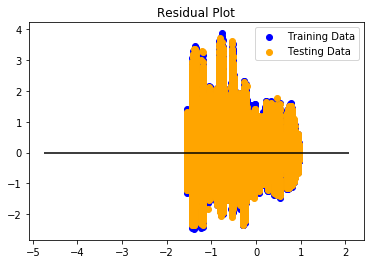

In [77]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
# scale predicted y values back to original domain
predictions = y_scaler.inverse_transform(predictions)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.savefig('model.jpg')
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4578969651796371, R2: 0.5422798700306561
